#             $$\text{Gnu Radio Companion with Machine Learning} $$

In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')


In [4]:
Clear = np.load("Data_\Clear.npy") 
WIFI_FLOOD = np.load("Data_\WIFI_FLOOD.npy")
LTE_FLOOD = np.load("Data_\LTE_FLOOD.bin.npy")
WIFI_300PING = np.load("Data_\WIFI_PING300.npy")
LTE_300PING = np.load("Data_\LTE_PING300.npy")
WIFI_1M = np.load("Data_\WIFI_1M.npy")
LTE_1M = np.load("Data_\LTE_1M.npy")


In [18]:
from Library.sinais_ import signal, concat_3
Wifi = signal(data=WIFI_FLOOD,slice = 400000, sinal = 'WIFI_FLOOD',id = 'WIFI_FLOOD')


In [23]:
Wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype    
---  ------  --------------   -----    
 0   0       400000 non-null  complex64
dtypes: complex64(1)
memory usage: 3.1 MB
None


In [50]:
df = pd.DataFrame(Wifi.real, Wifi.imag)
df , pd.set_option("mode.copy_on_write", True)

(                  0
  0.000153 -0.000031
  0.000061 -0.000244
  0.000000  0.000000
  0.000183  0.000000
  0.000214 -0.000061
 ...             ...
 -0.000305 -0.000183
 -0.000275 -0.000153
 -0.000397 -0.000702
 -0.000488 -0.000458
 -0.000427 -0.000366
 
 [400000 rows x 1 columns],
 None)

In [51]:
ds = df.convert_dtypes(dtype_backend ="pyarrow")

NameError: name 'ArrowDtype' is not defined

In [61]:
CLEAR = (signal(data=Clear,slice = 400000, sinal = 'Clear', id = 'Clear'))
CLEAR.info()
CLEAR.to_pandas()
CLEAR.database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype    
---  ------  --------------   -----    
 0   0       400000 non-null  complex64
dtypes: complex64(1)
memory usage: 3.1 MB
None


,Clear_Real,Clear_Imag,ID
0,0.004425,0.006348,Clear
1,0.005676,0.006348,Clear
2,0.006317,0.007904,Clear
3,0.006562,0.008515,Clear
4,0.006745,0.009980,Clear
...,...,...,...
399995,0.000061,-0.000519,Clear
399996,-0.000031,-0.000732,Clear
399997,0.000031,-0.000641,Clear
399998,-0.000092,-0.000763,Clear


In [85]:
LTE = (signal(data=LTE_FLOOD,slice = 400000, sinal = 'LTE_FLOOD', id='LTE_FLOOD'))
LTE.info()
LTE.to_pandas()
LTE.database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype    
---  ------  --------------   -----    
 0   0       400000 non-null  complex64
dtypes: complex64(1)
memory usage: 3.1 MB
None


,LTE_FLOOD_Real,LTE_FLOOD_Imag,ID
0,0.000244,0.000122,LTE_FLOOD
1,0.000153,-0.000153,LTE_FLOOD
2,-0.000153,-0.000153,LTE_FLOOD
3,0.000000,0.000336,LTE_FLOOD
4,0.000275,0.000305,LTE_FLOOD
...,...,...,...
399995,-0.000122,-0.000336,LTE_FLOOD
399996,0.000000,-0.000427,LTE_FLOOD
399997,0.000183,-0.000214,LTE_FLOOD
399998,0.000122,-0.000397,LTE_FLOOD


In [90]:
uniao = concat_3(database1= CLEAR.database, database2=Wifi.database,database3=LTE.database ,sinal1 ='Clear',sinal2 = 'WIFI_FLOOD',sinal3 = 'LTE_FLOOD')
uniao.merge()
df = uniao.concat
df.info()
df

Concatenação efetuada
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype          
---  ------   --------------    -----          
 0   Signals  1200000 non-null  object         
 1   Real     1200000 non-null  float32        
 2   Imag     1200000 non-null  double[pyarrow]
 3   ID       1200000 non-null  object         
dtypes: double[pyarrow](1), float32(1), object(2)
memory usage: 32.0+ MB


,Signals,Real,Imag,ID
0,Clear,0.004425,0.006348,Clear
1,Clear,0.005676,0.006348,Clear
2,Clear,0.006317,0.007904,Clear
3,Clear,0.006562,0.008515,Clear
4,Clear,0.006745,0.009980,Clear
...,...,...,...,...
1199995,LTE_FLOOD,-0.000122,-0.000336,LTE_FLOOD
1199996,LTE_FLOOD,0.000000,-0.000427,LTE_FLOOD
1199997,LTE_FLOOD,0.000183,-0.000214,LTE_FLOOD
1199998,LTE_FLOOD,0.000122,-0.000397,LTE_FLOOD


In [64]:
from Library.TrainTestSplit import TrainTestSplit 
spliter = TrainTestSplit(data = df)
# Acessando os conjuntos de treinamento e teste
X_train, X_test, y_train, y_test =spliter.train_test_split( test_size=0.275, random_state=210)

print("x_train:", X_train)
print("y_train:", X_test)
print("x_test:", y_train)
print("y_test:", y_test)


x_train:              Real      Imag
662190  -0.001404 -0.002319
352005  -0.000122 -0.000641
1065155  0.000153 -0.001617
156449  -0.000427 -0.004547
425411  -0.015809 -0.023164
...           ...       ...
723495  -0.000824 -0.001373
1099718 -0.000122 -0.000977
695140  -0.001434 -0.001923
488428  -0.008515 -0.012116
510055  -0.007080 -0.010224

[870000 rows x 2 columns]
y_train:              Real      Imag
416950  -0.017396 -0.024781
1097822  0.000000 -0.001038
1109722  0.000397 -0.000946
639269  -0.001953 -0.002869
113454  -0.000763 -0.006989
...           ...       ...
1001494 -0.000183 -0.002533
980206   0.000061 -0.003418
225384  -0.000092 -0.002350
381798   0.000031 -0.000671
726798  -0.000793 -0.001068

[330000 rows x 2 columns]
x_test: 662190     WIFI_FLOOD
352005          Clear
1065155     LTE_FLOOD
156449          Clear
425411     WIFI_FLOOD
              ...    
723495     WIFI_FLOOD
1099718     LTE_FLOOD
695140     WIFI_FLOOD
488428     WIFI_FLOOD
510055     WIFI_FLOOD
Name: 

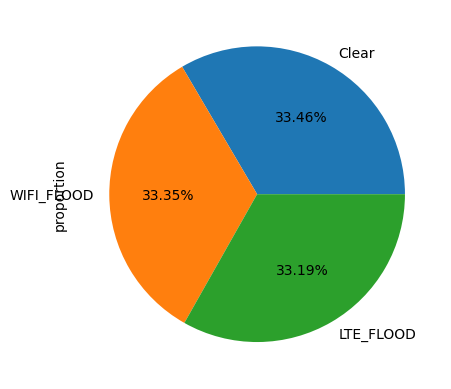

In [65]:
# Criando um objeto Visualization
from Library.Plots_model import Visualization
vis = Visualization()

# Plotando o gráfico de pizza
vis.plot_pie(y_test) # Distruição de X_train

In [66]:
from Library.Normalizing import Normalizing
normalized = Normalizing(X_train=X_train, X_test= X_test)
print(f"""\n normalized.X_test: {normalized.X_test}
normalized.X_train {normalized.X_train}""")


 normalized.X_test: [[0.11378126 0.10833023]
 [0.39333006 0.39895406]
 [0.39970574 0.40007472]
 ...
 [0.39185876 0.38289131]
 [0.3938205  0.40343669]
 [0.38057872 0.39858051]]
normalized.X_train [[0.47694753 0.47672552]
 [0.49364069 0.49438202]
 [0.4972178  0.48410915]
 ...
 [0.47655007 0.48089888]
 [0.38434021 0.37367577]
 [0.40302066 0.39357945]]


In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 9,weights='distance', p=2)
knn_fit = knn.fit(normalized.X_train ,y_train)
model = knn_fit
model

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [68]:
from Library.metrics import metrics
metrics = metrics(model = model,
X_train =normalized.X_train,X_test = normalized.X_test, y_train=y_train ,y_test=y_test)

metrics.table()

,Score,Accuracy,F1-Score,Recall
0,0.391127,0.391127,0.267919,0.391127


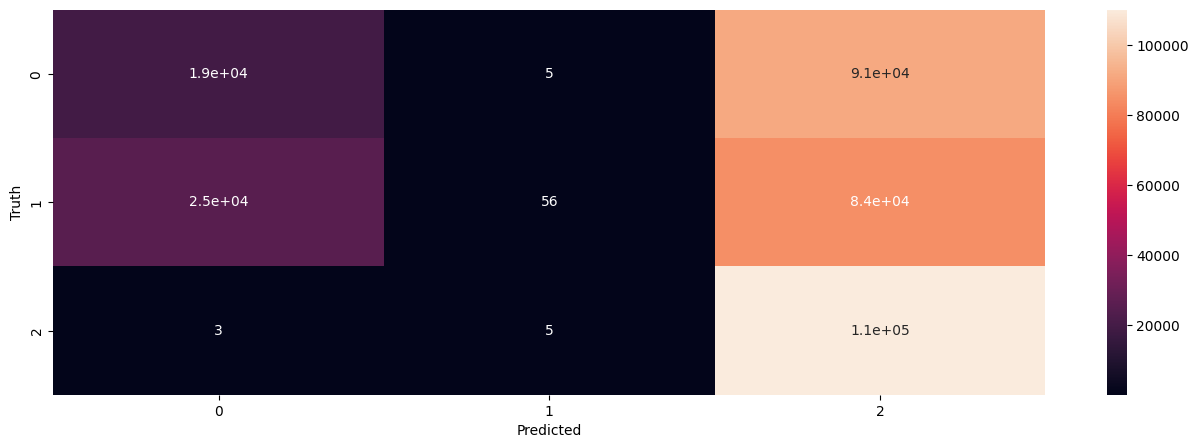

In [72]:
from Library.Plots_model import Visualization ,RandomizedSearchCVWrapper
confusion = Visualization()
confusion_matrix = confusion.confusion_matrix(model=model,X_train =normalized.X_train,
X_test= normalized.X_test, y_train= y_train, y_test= y_test)

In [73]:
metrics.confusion_matrix()

array([[ 18975,      5,  91453],
       [ 25021,     56,  84441],
       [     3,      5, 110041]], dtype=int64)

In [74]:
metrics.report()

              precision    recall  f1-score   support

       Clear       0.43      0.17      0.25    110433
   LTE_FLOOD       0.85      0.00      0.00    109518
  WIFI_FLOOD       0.38      1.00      0.56    110049

    accuracy                           0.39    330000
   macro avg       0.55      0.39      0.27    330000
weighted avg       0.55      0.39      0.27    330000



In [75]:

import category_encoders as ce
encoder = ce.ordinal.OrdinalEncoder()

parameters = {'n_neighbors': [3,5,7,9,13,15,17],
                         'weights': ['uniform', 'distance'], 'p':[1,2]
             }
n_iter=5
cv=3
scoring='neg_mean_squared_error' 
random_state=15
return_train_score=True
n_jobs = -1
verbose = 0
knn = KNeighborsClassifier()

random_model = RandomizedSearchCVWrapper(model= knn, param_distributions =parameters , X_train = normalized.X_train, 
y_train= encoder.fit_transform(y_train), n_iter= n_iter, cv=cv,random_state=random_state,
return_train_score =return_train_score, scoring= scoring, n_jobs = n_jobs, verbose = verbose )


In [76]:
random_model.__dict__

{'model': KNeighborsClassifier(),
 'param_distributions': {'n_neighbors': [3, 5, 7, 9, 13, 15, 17],
  'weights': ['uniform', 'distance'],
  'p': [1, 2]},
 'n_iter': 5,
 'cv': 3,
 'random_state': 20,
 'n_jobs': -1,
 'scoring': 'neg_mean_squared_error',
 'verbose': 0,
 'return_train_score': True,
 'randomsearch': RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                    param_distributions={'n_neighbors': [3, 5, 7, 9, 13, 15, 17],
                                         'p': [1, 2],
                                         'weights': ['uniform', 'distance']},
                    random_state=20, return_train_score=True,
                    scoring='neg_mean_squared_error'),
 'random_fit': RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                    param_distributions={'n_neighbors': [3, 5, 7, 9, 13, 15, 17],
                                         'p': [1, 2],
                                         'wei

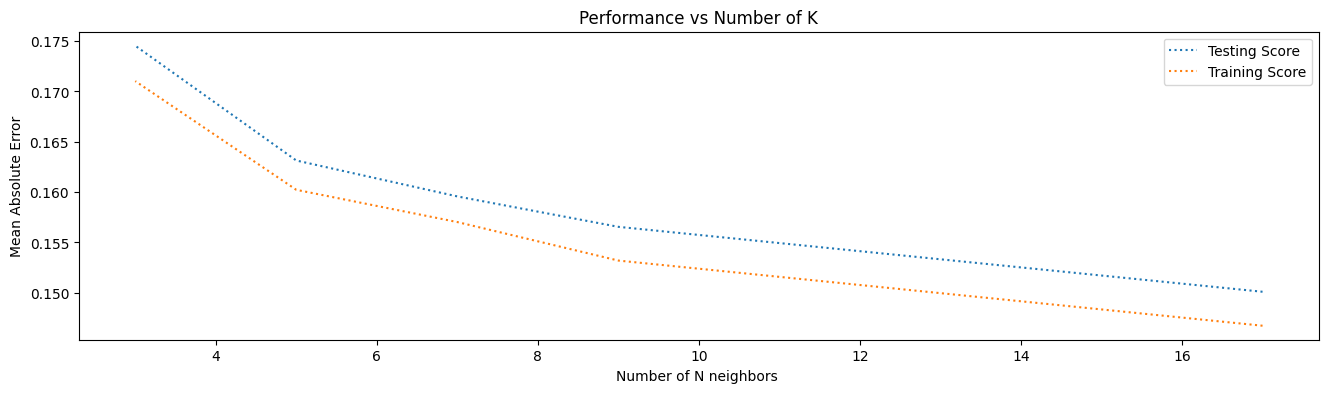

In [77]:
random_model.plot_mean_performance()

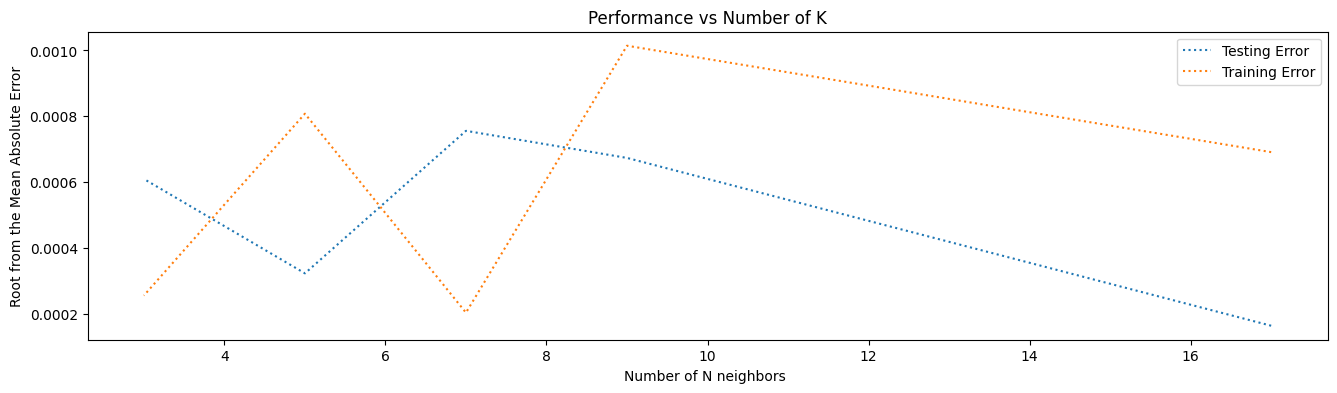

In [78]:
random_model.plot_std_performance()

In [79]:
random_model.results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
4,1.746841,0.149298,10.400847,1.538984,distance,2,17,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",-0.150317,-0.150041,-0.149928,-0.150095,0.000164,1,-0.147698,-0.146210,-0.146255,-0.146721,0.000691
0,2.239430,0.021961,9.244081,0.199793,distance,1,9,"{'weights': 'distance', 'p': 1, 'n_neighbors': 9}",-0.157428,-0.155793,-0.156417,-0.156546,0.000673,2,-0.154609,-0.152279,-0.152695,-0.153194,0.001014
3,2.058089,0.062864,27.552276,0.827559,uniform,2,7,"{'weights': 'uniform', 'p': 2, 'n_neighbors': 7}",-0.158731,-0.160562,-0.159410,-0.159568,0.000756,3,-0.157145,-0.157181,-0.156733,-0.157020,0.000203
1,2.247123,0.075701,18.973964,0.616834,uniform,1,5,"{'weights': 'uniform', 'p': 1, 'n_neighbors': 5}",-0.163541,-0.162752,-0.163114,-0.163136,0.000323,4,-0.161140,-0.159174,-0.160357,-0.160224,0.000808
2,2.051764,0.128102,8.467434,0.290215,distance,1,3,"{'weights': 'distance', 'p': 1, 'n_neighbors': 3}",-0.173793,-0.175286,-0.174541,-0.174540,0.000610,5,-0.171310,-0.171067,-0.170690,-0.171022,0.000255


In [80]:
random_model.randomsearch

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 5, 7, 9, 13, 15, 17],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=20, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [ ]:
random_model.random_fit

In [81]:
from Library.metrics import metrics

metrics_random = metrics(model = random_model.randomsearch.fit(normalized.X_train ,y_train),
X_train =normalized.X_train,X_test = normalized.X_test, y_train=y_train ,y_test=y_test)

In [82]:
metrics_random.report()

              precision    recall  f1-score   support

       Clear       0.43      0.18      0.25    110433
   LTE_FLOOD       0.36      0.00      0.00    109518
  WIFI_FLOOD       0.39      1.00      0.56    110049

    accuracy                           0.39    330000
   macro avg       0.39      0.39      0.27    330000
weighted avg       0.39      0.39      0.27    330000



In [83]:
metrics_random.confusion_matrix()

array([[ 19372,      4,  91057],
       [ 25419,      5,  84094],
       [     3,      5, 110041]], dtype=int64)

#### LTE 300 PING & WIFI 300 PING

In [86]:

WIFI_300PING = (signal(data=WIFI_300PING,slice = 400000, sinal = 'WIFI_300PING',id = 'WIFI_300PING'))
WIFI_300PING.info()
WIFI_300PING.to_pandas()
WIFI_300PING.database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype    
---  ------  --------------   -----    
 0   0       400000 non-null  complex64
dtypes: complex64(1)
memory usage: 3.1 MB
None


,WIFI_300PING_Real,WIFI_300PING_Imag,ID
0,-0.000031,0.000031,WIFI_300PING
1,-0.000183,0.000031,WIFI_300PING
2,-0.000092,-0.000092,WIFI_300PING
3,0.000183,-0.000183,WIFI_300PING
4,0.000000,0.000031,WIFI_300PING
...,...,...,...
399995,-0.000519,0.000214,WIFI_300PING
399996,-0.000549,0.000183,WIFI_300PING
399997,-0.000305,0.000031,WIFI_300PING
399998,-0.000305,-0.000214,WIFI_300PING


In [87]:
LTE_300PING = (signal(data=LTE_300PING,slice = 400000, sinal = 'LTE_300PING',id = 'LTE_300PING'))
LTE_300PING.info()
LTE_300PING.to_pandas()
LTE_300PING.database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype    
---  ------  --------------   -----    
 0   0       400000 non-null  complex64
dtypes: complex64(1)
memory usage: 3.1 MB
None


,LTE_300PING_Real,LTE_300PING_Imag,ID
0,0.005768,0.012146,LTE_300PING
1,0.003235,0.016511,LTE_300PING
2,0.001770,0.019379,LTE_300PING
3,0.000977,0.021912,LTE_300PING
4,0.001556,0.023835,LTE_300PING
...,...,...,...
399995,-0.000153,-0.000275,LTE_300PING
399996,-0.000244,-0.000458,LTE_300PING
399997,0.000031,-0.000336,LTE_300PING
399998,0.000000,-0.000305,LTE_300PING


In [91]:
uniao = concat_3(database1= CLEAR.database, database2=WIFI_300PING.database,database3=LTE_300PING.database ,sinal1 ='Clear',sinal2 = 'WIFI_300PING',sinal3 = 'LTE_300PING')
uniao.merge()
# uniao.concat = uniao.concat.reset_index().rename(columns={'level_0':'Signals','level_1':'index'}).drop(columns=['index'])
df_ping = uniao.concat
df_ping.info()
df_ping

Concatenação efetuada
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype          
---  ------   --------------    -----          
 0   Signals  1200000 non-null  object         
 1   Real     1200000 non-null  float32        
 2   Imag     1200000 non-null  double[pyarrow]
 3   ID       1200000 non-null  object         
dtypes: double[pyarrow](1), float32(1), object(2)
memory usage: 32.0+ MB


,Signals,Real,Imag,ID
0,Clear,0.004425,0.006348,Clear
1,Clear,0.005676,0.006348,Clear
2,Clear,0.006317,0.007904,Clear
3,Clear,0.006562,0.008515,Clear
4,Clear,0.006745,0.009980,Clear
...,...,...,...,...
1199995,LTE_300PING,-0.000153,-0.000275,LTE_300PING
1199996,LTE_300PING,-0.000244,-0.000458,LTE_300PING
1199997,LTE_300PING,0.000031,-0.000336,LTE_300PING
1199998,LTE_300PING,0.000000,-0.000305,LTE_300PING


In [92]:
spliter = TrainTestSplit(data = df_ping)
# Acessando os conjuntos de treinamento e teste
X_train, X_test, y_train, y_test =spliter.train_test_split( test_size=0.275, random_state=210)

print("x_train:", X_train)
print("y_train:", X_test)
print("x_test:", y_train)
print("y_test:", y_test)


x_train:              Real      Imag
662190  -0.001892  0.000031
352005  -0.000122 -0.000641
1065155 -0.000458 -0.001312
156449  -0.000427 -0.004547
425411  -0.018311  0.002472
...           ...       ...
723495  -0.000916  0.000153
1099718 -0.000427 -0.001038
695140  -0.001404  0.000275
488428  -0.010041  0.001740
510055  -0.008271  0.001068

[870000 rows x 2 columns]
y_train:              Real      Imag
416950  -0.019959  0.002747
1097822 -0.000305 -0.001007
1109722 -0.000549 -0.000793
639269  -0.002106  0.000366
113454  -0.000763 -0.006989
...           ...       ...
1001494 -0.001251 -0.002350
980206  -0.001160 -0.003113
225384  -0.000092 -0.002350
381798   0.000031 -0.000671
726798  -0.000855  0.000153

[330000 rows x 2 columns]
x_test: 662190     WIFI_300PING
352005            Clear
1065155     LTE_300PING
156449            Clear
425411     WIFI_300PING
               ...     
723495     WIFI_300PING
1099718     LTE_300PING
695140     WIFI_300PING
488428     WIFI_300PING
510055  

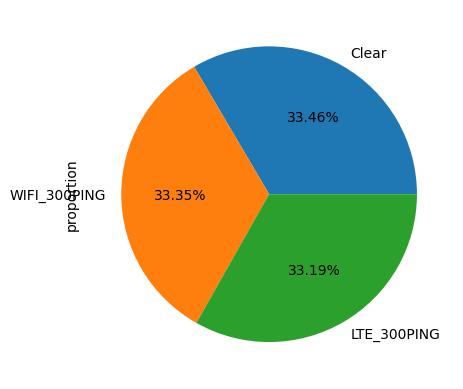

In [93]:
# Criando um objeto Visualization
vis = Visualization()

# Plotando o gráfico de pizza
vis.plot_pie(y_test) # Distruição de X_train

In [94]:
normalized = Normalizing(X_train=X_train, X_test= X_test)
print(f"""\n normalized.X_test: {normalized.X_test}
normalized.X_train {normalized.X_train}""")


 normalized.X_test: [[0.11597808 0.37075828]
 [0.4365356  0.31922917]
 [0.43255352 0.32216172]
 ...
 [0.44001992 0.30079599]
 [0.44201096 0.32383746]
 [0.42757592 0.33514873]]
normalized.X_train [[0.48998398 0.2416087 ]
 [0.51322116 0.23495614]
 [0.50881411 0.22830359]
 ...
 [0.49639424 0.24402781]
 [0.38301282 0.25854247]
 [0.40625    0.25188992]]


In [100]:
knn = KNeighborsClassifier(n_neighbors= 9,weights='distance', p=2)
model_ping = knn.fit(normalized.X_train ,y_train)
model_ping

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [99]:
metrics_ping = metrics(model = model_ping,
X_train =normalized.X_train,X_test = normalized.X_test, y_train=y_train ,y_test=y_test)

metrics.table()

TypeError: 'metrics' object is not callable

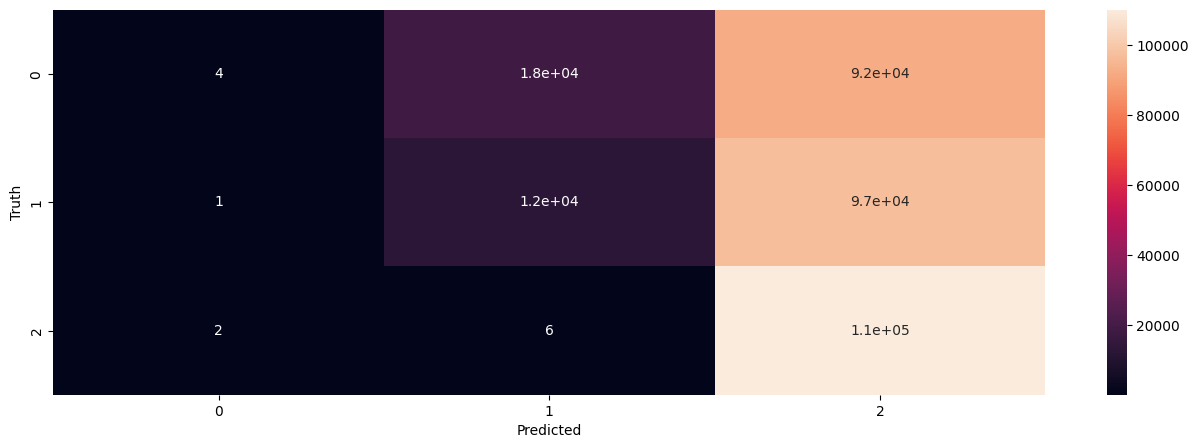

In [101]:
confusion = Visualization()
confusion_matrix = confusion.confusion_matrix(model=model_ping,X_train =normalized.X_train,
X_test= normalized.X_test, y_train= y_train, y_test= y_test)

In [102]:
metrics.report()

              precision    recall  f1-score   support

       Clear       0.57      0.00      0.00    110433
 LTE_300PING       0.41      0.11      0.18    109518
WIFI_300PING       0.37      1.00      0.54    110049

    accuracy                           0.37    330000
   macro avg       0.45      0.37      0.24    330000
weighted avg       0.45      0.37      0.24    330000

